In [1]:
import pandas as pd
import numpy as np
import os, inspect
from RGCPD import RGCPD
from RGCPD import BivariateMI
import class_BivariateMI, functions_pp
from stat_models_cont import ScikitModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV
import func_models as fc_utils
from pipeline import pipeline

%load_ext autoreload
%autoreload 2

# main directory is the directory of this notebook
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) 

# my main directory (which contains folders with data etc)
my_main_dir = 'C:\\Users\\alicj\\Desktop\\WORK'
data_path = os.path.join(my_main_dir, 'data')

C:\Users\alicj\AppData\Local\Continuum\anaconda3\envs\RGCPD\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Not able to load in plotting modules, check installment of networkx


In [2]:
from data_preparations import coordinates, data_steps, mean, xarray

In [3]:
data = pd.read_csv(os.path.join(data_path, 'JFM.X1981_X2020.csv'))

In [4]:
data

,V1,V2,X1981,X1982,X1983,X1984,X1985,X1986,X1987,X1988,...,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
0,30.225,-10.475,611,602,694,750,701,809,689,847,...,717,710,764,764,696,676,683,727,686,862
1,30.275,-10.475,617,627,702,768,691,835,703,865,...,710,681,775,764,705,695,700,739,691,878
2,30.325,-10.475,633,632,713,770,757,838,726,861,...,730,704,801,786,716,714,712,744,708,902
3,30.375,-10.475,637,676,706,751,766,828,735,864,...,724,703,802,789,722,712,730,733,707,902
4,30.425,-10.475,632,673,670,727,761,808,725,846,...,717,702,794,791,706,698,737,723,706,901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47144,32.775,-26.825,353,153,227,530,345,260,253,202,...,189,205,212,248,209,147,207,302,355,228
47145,32.825,-26.825,398,173,263,620,383,324,278,195,...,200,222,230,277,236,165,243,342,405,258
47146,32.875,-26.825,443,203,325,712,432,330,335,253,...,232,243,259,308,280,192,281,381,453,299
47147,32.925,-26.825,245,107,152,430,216,171,163,105,...,128,108,128,146,135,134,166,177,178,256


In [5]:
columns = ['Var1', 'Var2']
for year in data.columns[2:]:
    columns.append(year[1:])

In [6]:
data.columns = columns

In [7]:
tete_jfm = coordinates(data, [30.21215, 35.346607], [-17.70114, -13.9988])
tete_jfm.head(10)

,Var1,Var2,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
14807,30.225,-14.025,527,636,473,493,619,611,421,701,...,452,594,543,537,584,466,794,457,466,504
14808,30.275,-14.025,523,640,474,490,613,606,419,709,...,439,598,534,534,591,449,805,448,462,520
14809,30.325,-14.025,518,641,447,488,584,631,413,721,...,431,595,500,515,571,439,793,492,452,520
14810,30.375,-14.025,520,648,483,528,589,664,421,750,...,440,596,494,518,564,438,799,485,455,522
14811,30.425,-14.025,530,650,470,525,594,685,424,742,...,448,618,501,518,582,461,810,508,471,524
14812,30.475,-14.025,534,651,475,526,600,686,428,744,...,453,617,497,521,574,490,814,505,476,542
14813,30.525,-14.025,551,650,485,494,592,663,397,712,...,462,626,518,539,592,515,837,514,487,563
14814,30.575,-14.025,587,675,488,533,621,706,436,783,...,480,644,546,563,624,558,876,546,505,584
14815,30.625,-14.025,602,681,501,538,637,717,441,796,...,490,654,542,577,628,556,887,563,518,604
14816,30.675,-14.025,571,650,482,502,605,684,417,750,...,468,603,514,547,598,538,840,532,500,569


In [8]:
tete_jfm_data = data_steps(tete_jfm, 'rainfall')

In [9]:
tete_jfm_data.tail()

,rainfall
index,
2016-01-01,386.773419
2017-01-01,702.764235
2018-01-01,486.764104
2019-01-01,584.699029
2020-01-01,476.852532


In [10]:
tete_jfm_xr = xarray(tete_jfm_data)

In [11]:
tete_jfm_xr.to_netcdf(os.path.join(data_path, 'JFM_tete.nc'))

In [12]:
# directory of target variable data
TV_path = os.path.join(data_path, 'JFM_tete.nc')

# directory of precursor data
prec_path = os.path.join(data_path,'sst_1950-2020_1_12_monthly_1.0deg.nc')

# directory for test data 
path_test = os.path.join(my_main_dir, 'test')

# directory for output
output_path = os.path.join(my_main_dir, 'out')

list_of_name_path = [(1, TV_path), ('sst', prec_path)]

In [13]:
function = class_BivariateMI.corr_map
alpha = 0.01
FDR_control = True 
distance_eps = 500
min_area_in_degrees2 = 5
tfreq = None
start_end_year = (1980, 2019)
start_end_TVyear = (1981, 2020)
TVdates_aggr = False
ext_annual_to_mon = False 
method = 'random_5'    # for time efficiency
detrend = True
labels = True
pred_type = 'continuous'
q = 0.6
name = 'rainfall'


lags = np.array([['09-01', '10-01'], ['11-01', '12-01']])            
periodnames = ['SO', 'ND']                                         
start_end_TVdate = ('01-01', '03-01')    

Start linear detrending ...
Done
Visual test on 0th observationDetected timeseries with annual mean values
tfreq is None, no common time aggregation used, loading annual mean data
Loaded pre-processed data of sst

[1980 2019] ('09-01', '10-01')
[1980 2019] ('11-01', '12-01')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(32dp, 80%)

Plotting Corr maps sst, split 0, lag SO
Plotting Corr maps sst, split 0, lag ND
Plotting Corr maps sst_labels_init, split 0, lag SO
Plotting Corr maps sst_labels_init, split 0, lag ND

Getting MI timeseries
There are [14, 11, 12, 11, 16] regions in total (list of different splits)


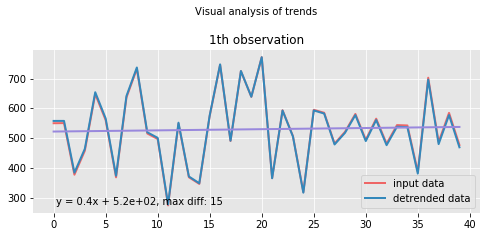

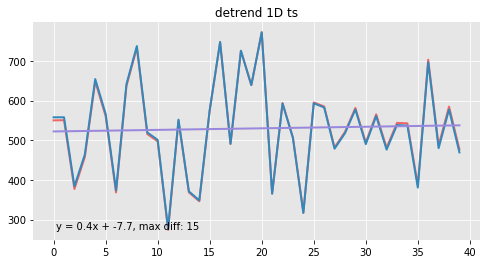

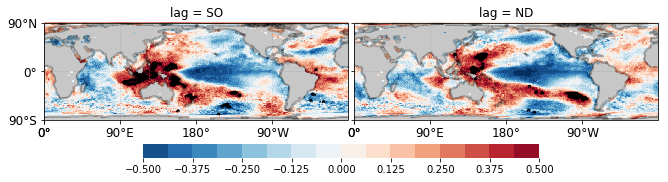

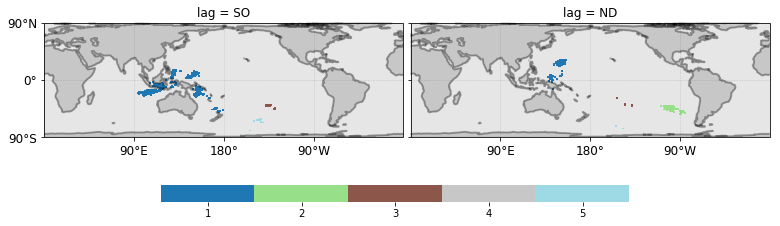

In [14]:
rg = pipeline(list_of_name_path, output_path, function, alpha, FDR_control, distance_eps, min_area_in_degrees2, tfreq, start_end_year, start_end_TVyear, 
             TVdates_aggr, ext_annual_to_mon, method, detrend, labels, pred_type, q, lags, periodnames, start_end_TVdate, name)

#### Getting original 1d timeseries

In [15]:
rg.df_fulltso.head()

,cluster,raw_target
time,,
1981-01-01,1,549.967069
1982-01-01,1,550.434532
1983-01-01,1,377.101023
1984-01-01,1,457.554972
1985-01-01,1,647.911834


#### Getting preprocessed 1d series

In [16]:
rg.df_fullts.head()

,1rainfall
1981-01-01,557.685665
1982-01-01,557.757302
1983-01-01,384.027968
1984-01-01,464.086092
1985-01-01,654.047128


In [17]:
rg.df_RV_ts.head()

,RV1rainfall
1981-01-01,557.685665
1982-01-01,557.757302
1983-01-01,384.027968
1984-01-01,464.086092
1985-01-01,654.047128


In [18]:
rg.input_freq

'annual'

In [19]:
rg.dates_TV

DatetimeIndex(['1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

In [20]:
rg.dates_all

DatetimeIndex(['1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

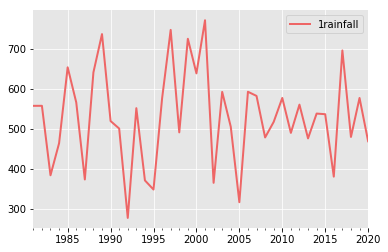

In [21]:
rg.df_fullts.plot()

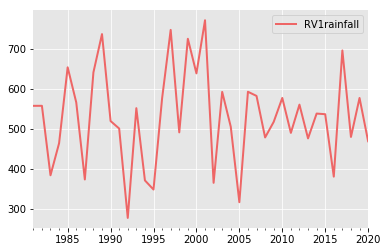

In [22]:
rg.df_RV_ts.plot()

In [23]:
rg.get_ts_prec()
rg._df_count


Getting MI timeseries
There are [14, 11, 12, 11, 16] regions in total (list of different splits)


SO..1..sst     5
SO..2..sst     4
SO..3..sst     5
SO..4..sst     3
SO..5..sst     5
SO..7..sst     3
SO..8..sst     3
SO..9..sst     3
ND..1..sst     5
ND..2..sst     4
ND..3..sst     5
ND..4..sst     4
ND..5..sst     5
ND..9..sst     5
SO..6..sst     3
ND..8..sst     1
ND..10..sst    1
dtype: object

In [24]:
rg.df_data

1rainfall  SO..1..sst  SO..2..sst  SO..3..sst  SO..4..sst  \
0 1981-01-01  557.685665   -0.139651    0.108939   -0.273565    0.223113   
  1982-01-01  557.757302   -0.032061    0.337451    0.102268   -0.005517   
  1983-01-01  384.027968   -0.724387    0.001882   -0.665496   -0.090659   
  1984-01-01  464.086092    0.070376   -0.047098    0.147838    0.743185   
  1985-01-01  654.047128    0.109839    0.134689   -0.157120   -0.036829   
...                  ...         ...         ...         ...         ...   
4 2016-01-01  380.638125   -0.661185   -0.318953   -0.677468   -0.475158   
  2017-01-01  696.233116    0.683004    0.795110    0.172864    0.238980   
  2018-01-01  479.837159    0.293508   -0.133871   -0.004122    0.798019   
  2019-01-01  577.376259   -0.145978   -0.017133    0.173649   -0.110745   
  2020-01-01  469.133937   -0.494269    0.370585   -0.444589   -0.416026   

              SO..5..sst  SO..7..sst  SO..8..sst  SO..9..sst  ND..1..sst  \
0 1981-01-01   -0.181017    0.122616    0.384665   -0.082104   -0.176826   
  1982-01-01    0.351415   -0.157210    0.276604   -0.373816   -0.006119   
  1983-01-01   -0.005943   -0.501561    0.970028    1.574019   -0.499976   
  1984-01-01    0.109441    0.043237    0.139739   -0.716489    0.006808   
  1985-01-01    0.012721    0.466832   -0.580233   -0.334627    0.209740   
...                  ...         ...         ...         ...         ...   
4 2016-01-01    0.270735   -0.472218    0.398000         NaN   -0.207547   
  2017-01-01   -0.537388    0.257343   -0.615180         NaN    0.438692   
  2018-01-01    0.065746    0.111637    0.375471         NaN    0.405551   
  2019-01-01    0.044381    0.350893   -0.043318         NaN    0.115733   
  2020-01-01    0.175493   -0.377152    0.526271         NaN   -0.147657   

              ND..2..sst  ND..3..sst  ND..4..sst  ND..5..sst  ND..9..sst  \
0 1981-01-01    0.522725   -0.047736    0.216367    0.335938   -0.231083   
  1982-01-01   -0.269885   -0.171967   -0.431872    0.140905   -0.244943   
  1983-01-01   -0.631922   -0.884237    0.258905    0.444070    2.593365   
  1984-01-01    0.418525   -0.583385   -0.474733    0.104404   -0.963661   
  1985-01-01   -0.017382   -0.343159   -0.143999   -0.043912   -1.171910   
...                  ...         ...         ...         ...         ...   
4 2016-01-01   -0.089856   -0.320365    0.294331    0.155536    0.702750   
  2017-01-01    1.098816    0.772358    0.802701   -0.131992    0.073591   
  2018-01-01    0.054033   -0.406061    0.283957   -0.052142    0.734639   
  2019-01-01    0.492931    0.295175    0.526442   -0.230916   -0.389720   
  2020-01-01   -0.019785   -0.472814   -0.077119    0.084760    0.583146   

              SO..6..sst  ND..8..sst  ND..10..sst  TrainIsTrue  RV_mask  
0 1981-01-01         NaN         NaN          NaN         True     True  
  1982-01-01         NaN         NaN          NaN         True     True  
  1983-01-01         NaN         NaN          NaN        False     True  
  1984-01-01         NaN         NaN          NaN        False     True  
  1985-01-01         NaN         NaN          NaN         True     True  
...                  ...         ...          ...          ...      ...  
4 2016-01-01   -0.734927    0.679108     0.255585         True     True  
  2017-01-01    0.610244   -0.311791    -0.089602         True     True  
  2018-01-01    0.742124   -0.156916    -0.684620        False     True  
  2019-01-01    0.512564    0.210709     0.198905         True     True  
  2020-01-01   -0.134610    0.385590     0.915929         True     True  

[200 rows x 20 columns]

### Combined lead-time model

Refers to making seperate models for each precursor region using multiple lags. These models are then used as input for the final forecasting model. This reduces the amount of precursors that are feed into the model at the same time and thereby reduces overfitting. Also, using multiple lags for each precursor seperately may result in a small set of models which are better at describing the low-frequency variability of the precursor timeseries. 

Step 1: Make multiple Combined-Lead time models, these predict the target using only a single precursor region with multiple lags.

Step 2: Merge the Combined-Lead time model predictions and use them as input to construct a final model to (again) forecast the target. 

In [25]:
import find_precursors, plot_maps

In [26]:
df_prec_regions = find_precursors.labels_to_df(rg.list_for_MI[0].prec_labels)

In [27]:
df_prec_regions # center lat,lon coordinates and size (in number of gridcells)

,latitude,longitude,n_gridcells
1.0,-6.749532,143.722707,1603.0
2.0,-33.876471,265.291176,340.0
3.0,-24.687919,218.271812,149.0
4.0,20.375000,121.187500,32.0
5.0,-50.674713,219.463218,435.0
6.0,41.470588,341.000000,34.0
7.0,-9.353659,341.036585,41.0
8.0,-9.779070,49.337209,43.0
9.0,-0.357645,209.079086,1138.0
10.0,-21.871429,11.542857,70.0


#### Splitting precursor regions

Plotting Corr maps sst_labels_init, split 0, lag SO

New label will become 11.0
Plotting Corr maps sst_labels_init, split 0, lag SO


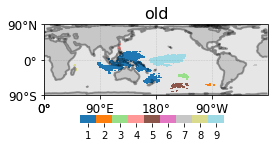

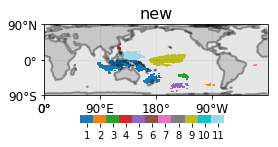

In [28]:
split = find_precursors.split_region_by_lonlat
new_labels, label = split(rg.list_for_MI[0].prec_labels, label=1,
                          kwrgs_mask_latlon={'latmax':0}) # <- split region 1 by 0 degree latitude
rg.list_for_MI[0].prec_labels = new_labels

Plotting Corr maps sst_labels_init, split 0, lag SO

New label will become 12.0
Plotting Corr maps sst_labels_init, split 0, lag SO


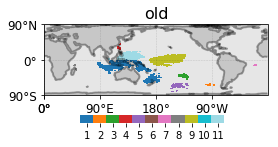

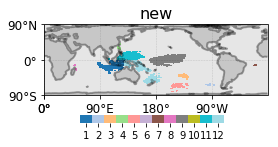

In [29]:
split = find_precursors.split_region_by_lonlat
new_labels, label = split(rg.list_for_MI[0].prec_labels, label=1,
                          kwrgs_mask_latlon={'lonmax':130}) # <- split region 1 by 130 degree longitude
rg.list_for_MI[0].prec_labels = new_labels

In [30]:
rg.get_ts_prec()


Getting MI timeseries
There are [18, 15, 16, 14, 19] regions in total (list of different splits)


In [31]:
import wrapper_PCMCI
corr, pvals = wrapper_PCMCI.df_data_Parcorr(rg.df_data, 
                                            target='1rainfall',
                                            keys=['SO..1..sst'],
                                            z_keys=['SO..2..sst'])
pvals

,,0,1,2,3,4
x,z,,,,,
SO..1..sst,SO..2..sst,0.000646,NaN,0.029295,0.008733,0.002168


In [32]:
corr # partial correlations?

,,0,1,2,3,4
x,z,,,,,
SO..1..sst,SO..2..sst,0.578865,NaN,0.391751,0.462913,0.529935


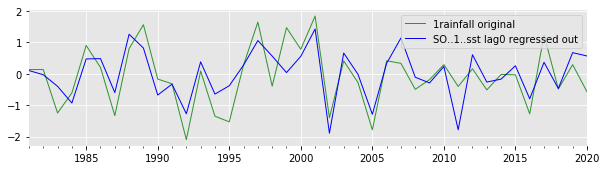

In [33]:
df_trans = rg.transform_df_data()

df_z_removed = wrapper_PCMCI.df_data_remove_z(df_trans,
                                              keys=['1rainfall'],
                                              z_keys=['SO..1..sst'])

In [35]:
regions = [i for i in range(1, 5)]
precursor_regions = np.unique(['..'.join(k.split('..')[1:]) for k in rg.df_data.columns[1:-2]]) # unique precursor regions 

for r in precursor_regions:
    df_trans = rg.transform_df_data()

    df_z_removed = wrapper_PCMCI.df_data_remove_z(df_trans,
                                              keys=['1rainfall'],
                                              z_keys=['SO..{}..sst'.format(r)])

KeyError: "None of [Index(['SO..1..sst..sst'], dtype='object')] are in the [columns]"

In [36]:
import func_models as fc_utils
from stat_models_cont import ScikitModel
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV


# choose type prediciton (continuous or probabilistic) by making comment #
prediction = 'continuous'   
prediction = 'events' ; q = .66 # quantile threshold for event definition

if prediction == 'continuous':
    model = ScikitModel(Ridge, verbosity=0)
    # You can also tune parameters by passing a list of values. Then GridSearchCV from sklearn will 
    # find the set of parameters that give the best mean score on all kfold test sets. 
    # below we pass a list of alpha's to tune the regularization.
    alphas = list(np.concatenate([[1E-20],np.logspace(-5,0, 6), np.logspace(.01, 2.5, num=25)]))                       
    kwrgs_model = {'scoringCV':'neg_mean_absolute_error',
                   'kfold':5,
                   'alpha':alphas} # large a, strong regul.
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':5,
                   'scoring':'neg_brier_score'}

target_ts = rg.TV.RV_ts ; 
target_ts = (target_ts - target_ts.mean()) / target_ts.std()
if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)
    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]
        

keys = [k for k in rg.df_data.columns[1:-2]]
out = rg.fit_df_data_ridge(target=target_ts,
                            keys=keys, 
                            fcmodel=model,
                            kwrgs_model=kwrgs_model,
                            transformer=None,
                            tau_min=0, tau_max=0) # <- lag should be zero
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100, # bootstrapping for Conf. Intervals
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[0].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[0].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[0]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[0]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
          'RMSE {:.2f}\n'.format(df_test_m.loc[0][0]['RMSE']),
          'MAE {:.2f}\n'.format(df_test_m.loc[0][0]['MAE']),
          'corrcoef {:.2f}'.format(df_test_m.loc[0][0]['corrcoef']),
          '\nTrain score\n',
          'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['RMSE']),
          'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['MAE']),
          'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[0]['corrcoef']))

LogisticRegressionCV 
 Test score
 BSS -0.00
 AUC 0.59 
Train score
 BSS 0.48
 AUC 0.92


In [37]:
target_ts.head()

,RV1rainfall
1981-01-01,0
1982-01-01,0
1983-01-01,0
1984-01-01,0
1985-01-01,1


In [38]:
collect_CL_models = [] # collect Combined-Lead time models
precursor_regions = np.unique(['..'.join(k.split('..')[1:]) for k in rg.df_data.columns[1:-2]]) # unique precursor regions 
sel_months = periodnames[:]

In [39]:
precursor_regions

array(['1..sst', '10..sst', '11..sst', '12..sst', '2..sst', '3..sst',
       '4..sst', '5..sst', '6..sst', '7..sst', '8..sst', '9..sst'],
      dtype='<U7')

In [40]:
sel_months

['SO', 'ND']

In [41]:
sum(rg.df_data['SO..8..sst'].isna() == True)

80

In [42]:
print(precursor_regions)

['1..sst' '10..sst' '11..sst' '12..sst' '2..sst' '3..sst' '4..sst'
 '5..sst' '6..sst' '7..sst' '8..sst' '9..sst']


In [44]:
collect_CL_models = [] # collect Combined-Lead time models
#precursor_regions = np.unique(['..'.join(k.split('..')[1:]) for k in rg.df_data.columns[1:-2]]) # unique precursor regions
precursor_regions = ['1..sst', '2..sst', '3..sst', '5..sst', '9..sst']
#precursor_regions = ['1..sst', '2..sst', '3..sst', '5..sst', '6..sst', '9..sst']
sel_months = periodnames[:]
for region in precursor_regions:
    # only use keys prior to target dates (July-August)
    keys_of_months = [k+'..'+region for k in sel_months]
    keys = [k for k in keys_of_months if region in k] # select all precursor timeseries of one particular region
    print(keys)
    single_region_model = rg.fit_df_data_ridge(target=target_ts,
                                               keys=keys,
                                               fcmodel=model,
                                               kwrgs_model=kwrgs_model,
                                               transformer=None,
                                               tau_min=0, tau_max=0)[0] # <- lag should be zero, already defined by periodmeans
    print(single_region_model)
    single_region_model = single_region_model.rename({0:region + '_comblead'}, axis=1)
    collect_CL_models.append(single_region_model.iloc[:,[1]])
df_CL_models = pd.concat(collect_CL_models, axis=1)

['SO..1..sst', 'ND..1..sst']
              RV1rainfall         0
0 1981-01-01            0  0.400092
  1982-01-01            0  0.413345
  1983-01-01            0  0.251321
  1984-01-01            0  0.496055
  1985-01-01            1  0.512445
...                   ...       ...
4 2016-01-01            0  0.246648
  2017-01-01            1  0.632622
  2018-01-01            0  0.365994
  2019-01-01            1  0.307489
  2020-01-01            0  0.167220

[200 rows x 2 columns]
['SO..2..sst', 'ND..2..sst']
              RV1rainfall         0
0 1981-01-01            0  0.735487
  1982-01-01            0  0.394227
  1983-01-01            0  0.053718
  1984-01-01            0  0.520141
  1985-01-01            1  0.379527
...                   ...       ...
4 2016-01-01            0  0.104723
  2017-01-01            1  0.984893
  2018-01-01            0  0.228100
  2019-01-01            1  0.542241
  2020-01-01            0  0.557445

[200 rows x 2 columns]
['SO..3..sst', 'ND..3..sst']
 

In [45]:
df_CL_models

1..sst_comblead  2..sst_comblead  3..sst_comblead  \
0 1981-01-01         0.400092         0.735487         0.296963   
  1982-01-01         0.413345         0.394227         0.351549   
  1983-01-01         0.251321         0.053718         0.107118   
  1984-01-01         0.496055         0.520141         0.270591   
  1985-01-01         0.512445         0.379527         0.259219   
...                       ...              ...              ...   
4 2016-01-01         0.246648         0.104723         0.193298   
  2017-01-01         0.632622         0.984893         0.552651   
  2018-01-01         0.365994         0.228100         0.316540   
  2019-01-01         0.307489         0.542241         0.472831   
  2020-01-01         0.167220         0.557445         0.216969   

              5..sst_comblead  9..sst_comblead  
0 1981-01-01         0.289833         0.394838  
  1982-01-01         0.180060         0.257265  
  1983-01-01         0.193555         0.042977  
  1984-01-01         0.269596         0.450224  
  1985-01-01         0.369306         0.758814  
...                       ...              ...  
4 2016-01-01         0.184200         0.137999  
  2017-01-01         0.777065         0.311165  
  2018-01-01         0.325430         0.131863  
  2019-01-01         0.360315         0.492303  
  2020-01-01         0.240890         0.163172  

[200 rows x 5 columns]

In [46]:
# first re-store information of traintest splits 
df_input = df_CL_models.merge(rg.df_data.iloc[:,-2:], 
                              left_index=True, right_index=True)
out = rg.fit_df_data_ridge(target=target_ts,
                           df_data=df_input,
                           fcmodel=model,
                           kwrgs_model=kwrgs_model,
                           transformer=None,
                           tau_min=0, tau_max=0) # <- lag should be zero
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
lag = 0
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[0].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[0].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[0]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[0]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
          'RMSE {:.2f}\n'.format(df_test_m.loc[0][0]['RMSE']),
          'MAE {:.2f}\n'.format(df_test_m.loc[0][0]['MAE']),
          'corrcoef {:.2f}'.format(df_test_m.loc[0][0]['corrcoef']),
          '\nTrain score\n',
          'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['RMSE']),
          'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['MAE']),
          'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[0]['corrcoef']))

LogisticRegressionCV 
 Test score at lag 0
 BSS 0.04
 AUC 0.64 
Train score
 BSS 0.48
 AUC 0.90


In [47]:
predict

RV1rainfall         0
0 1981-01-01            0  0.537994
  1982-01-01            0  0.261327
  1983-01-01            0  0.068657
  1984-01-01            0  0.406755
  1985-01-01            1  0.446235
...                   ...       ...
4 2016-01-01            0  0.082286
  2017-01-01            1  0.900381
  2018-01-01            0  0.162736
  2019-01-01            1  0.500511
  2020-01-01            0  0.272703

[200 rows x 2 columns]